In [1]:
#pip install folium
#!pip install geopandas
#!pip install geojson

In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson

In [3]:
with open("../datasets/data.pkl", "rb") as file1:
    data = pickle.load(file1)

Listando las primeras 10 filas del DataFrame

In [4]:
data.head(10)

,id_hecho,nro_victimas,fecha,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direc_normalizada,comuna,longitud,latitud,participantes,acusado,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,1,2016-01-01,4,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,Piedra Buena Av.,"Fernandez De La Cruz, F., Gral. Av.","Piedra Buena Av. Y Fernandez De La Cruz, F., G...",comuna 8,-58.475340,-34.687570,Moto-Auto,Auto,Conductor,Moto,Masculino,19,2016-01-01
1,2016-0002,1,2016-01-02,1,Av Gral Paz Y Av De Los Corrales,Gral Paz,"Paz, Gral. Av.",De Los Corrales Av.,"Paz, Gral. Av. Y De Los Corrales Av.",comuna 9,-58.508775,-34.669777,Auto-Pasajeros,Pasajeros,Conductor,Auto,Masculino,70,2016-01-02
2,2016-0003,1,2016-01-03,7,Av Entre Rios 2034,Avenida,Entre Rios Av.,Sd,Entre Rios Av. 2034,comuna 1,-58.390403,-34.631894,Moto-Auto,Auto,Conductor,Moto,Masculino,30,2016-01-03
3,2016-0004,1,2016-01-10,0,Av Larrazabal Y Gral Villegas Conrado,Avenida,Larrazabal Av.,"Villegas, Conrado, Gral.","Larrazabal Av. Y Villegas, Conrado, Gral.",comuna 8,-58.465039,-34.680930,Moto-Sd,Sd,Conductor,Moto,Masculino,18,
4,2016-0005,1,2016-01-21,5,Av San Juan Y Presidente Luis Saenz Peña,Avenida,San Juan Av.,"Saenz Pe?A, Luis, Pres.","San Juan Av. Y Saenz Peã‘A, Luis, Pres.",comuna 1,-58.387183,-34.622466,Moto-Pasajeros,Pasajeros,Conductor,Moto,Masculino,29,2016-02-01
5,2016-0008,1,2016-01-24,18,Av 27 De Febrero Y Av Escalada,Avenida,27 De Febrero Av.,Escalada Av.,27 De Febrero Av. Y Escalada Av.,comuna 8,-58.444513,-34.684759,Moto-Objeto Fijo,Objeto Fijo,Conductor,Moto,Masculino,30,2016-01-24
6,2016-0009,1,2016-01-24,19,Nogoya Y Joaquin V. Gonzales,Calle,Nogoya,"Gonzalez, Joaquin V.","Nogoya Y Gonzalez, Joaquin V.",comuna 11,-58.500959,-34.608254,Moto-Auto,Auto,Pasajero_Acompañante,Moto,Masculino,29,2016-01-26
7,2016-0010,1,2016-01-29,15,Av General Paz Y Av De Los Corrales,Gral Paz,"Paz, Gral. Av.",De Los Corrales Av.,"Paz, Gral. Av. Y De Los Corrales Av.",comuna 9,-58.508775,-34.669777,Moto-Auto,Auto,Conductor,Moto,Masculino,18,2016-01-29
8,2016-0012,1,2016-02-08,1,Av Belgrano Y Bernardo De Irigoyen,Avenida,Belgrano Av.,"Irigoyen, Bernardo De","Belgrano Av. E Irigoyen, Bernardo De",comuna 1,-58.380486,-34.613039,Moto-Cargas,Cargas,Conductor,Moto,Masculino,22,2016-02-08
9,2016-0013,1,2016-02-10,11,Av Entre Rios 1366,Avenida,Entre Rios Av.,Sd,Entre Rios Av. 1366,comuna 1,-58.391149,-34.624774,Peaton-Auto,Auto,Peaton,Peaton,Masculino,16,2016-02-10


Consultando información sobre tipo de índice, los tipos de datos por columna, valores no nulos y uso de memoria en el DataFrame


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_hecho             717 non-null    object 
 1   nro_victimas         717 non-null    int64  
 2   fecha                717 non-null    object 
 3   franja_horaria       716 non-null    Int64  
 4   lugar_hecho          717 non-null    object 
 5   tipo_calle           717 non-null    object 
 6   calle                717 non-null    object 
 7   cruce                717 non-null    object 
 8   direc_normalizada    717 non-null    object 
 9   comuna               717 non-null    object 
 10  longitud             704 non-null    float64
 11  latitud              704 non-null    float64
 12  participantes        717 non-null    object 
 13  acusado              717 non-null    object 
 14  rol                  717 non-null    object 
 15  victima              717 non-null    obj

Consulta del resumen estadístico de las columnas numéricas presentes en el DataFrame. Este método calcula algunas medidas estadísticas como percentil, media y desviación estándar de los valores numéricos del DataFrame

In [6]:
data.describe()

,nro_victimas,franja_horaria,longitud,latitud,edad
count,717.000000,716.0,704.000000,704.000000,664.0
mean,1.061367,11.554469,-58.441664,-34.619700,42.167169
std,0.257024,6.700055,0.046397,0.035292,19.788034
min,1.000000,0.0,-58.529942,-34.705250,1.0
25%,1.000000,6.0,-58.476556,-34.643918,27.0
50%,1.000000,11.0,-58.444513,-34.622866,37.0
75%,1.000000,17.0,-58.401841,-34.597013,56.25
max,3.000000,23.0,-58.356082,-34.534654,95.0


Consultando el Porcentaje de valores nulos por columna

In [7]:
porcentaje_nulos = data.isna().sum().sort_values(ascending=False) / len(data)
porcentaje_nulos

edad                   0.073919
longitud               0.018131
latitud                0.018131
franja_horaria         0.001395
id_hecho               0.000000
sexo                   0.000000
victima                0.000000
rol                    0.000000
acusado                0.000000
participantes          0.000000
comuna                 0.000000
nro_victimas           0.000000
direc_normalizada      0.000000
cruce                  0.000000
calle                  0.000000
tipo_calle             0.000000
lugar_hecho            0.000000
fecha                  0.000000
fecha_fallecimiento    0.000000
dtype: float64

<Axes: >

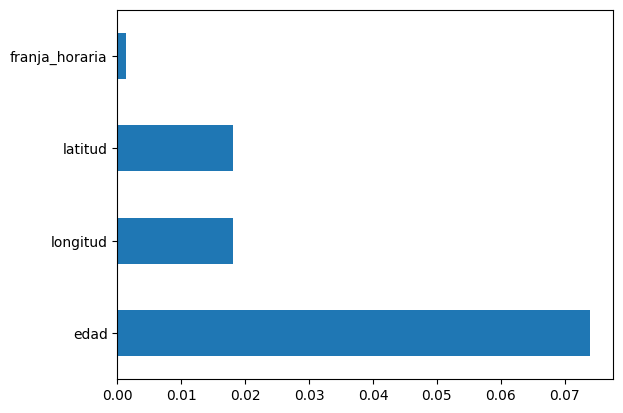

In [8]:
porcentaje_nulos[porcentaje_nulos != 0].plot(kind='barh')

El procentaje de valores nulos por Columna, es muy bajo y no llegan al 30% lo cual es una buena señal para no prescindir de esas filas o rellenarlos a través de la media

In [9]:
print(f"Numero de filas duplicadas = {data.duplicated().sum()}")

Numero de filas duplicadas = 0


Realizamos una descripción estadística sobre las de columnas de tipo texto

In [10]:

tipo_texto = data.select_dtypes(include=['object']).columns
df_texto = data[tipo_texto]
df_texto.describe()

,id_hecho,fecha,lugar_hecho,tipo_calle,calle,cruce,direc_normalizada,comuna,participantes,acusado,rol,victima,sexo,fecha_fallecimiento
count,717,717,717,717,717,717,717,717,717,717,717,717,717,717
unique,696,598,681,4,280,318,636,16,41,10,5,8,3,562
top,2017-0035,2018-12-18,Av 27 De Febrero Y Av Escalada,Avenida,"Paz, Gral. Av.",Sd,Sd,comuna 1,Peaton-Pasajeros,Auto,Conductor,Moto,Masculino,
freq,3,3,4,442,61,177,9,93,105,210,330,303,545,69


Revisión de Valores Atípicos/Extremos u Outliers

In [11]:
df_numerico = data.select_dtypes(include=['number']) 

In [12]:
df_numerico

,nro_victimas,franja_horaria,longitud,latitud,edad
0,1,4,-58.475340,-34.687570,19
1,1,1,-58.508775,-34.669777,70
2,1,7,-58.390403,-34.631894,30
3,1,0,-58.465039,-34.680930,18
4,1,5,-58.387183,-34.622466,29
...,...,...,...,...,...
712,1,17,-58.433538,-34.645616,18
713,1,1,-58.467398,-34.651178,43
714,1,0,-58.472934,-34.619847,27
715,1,10,-58.470668,-34.650217,60


In [13]:
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1 
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (df_numerico < limite_inf) | (df_numerico > limite_sup)
valores_atipicos = df_numerico[mascaras]

valores_atipicos.nro_victimas[valores_atipicos.nro_victimas.notnull()].head(10)

29     2.0
30     2.0
98     2.0
99     2.0
163    2.0
164    2.0
173    3.0
174    3.0
175    3.0
176    2.0
Name: nro_victimas, dtype: float64

Los outliers para la columna "nro_victimas" son los valores de 2 o 3 porque la mayor cantidad de registros estan asociados a tener como número de victimas el valor de 1

### Matriz de Correlación

In [14]:
data

,id_hecho,nro_victimas,fecha,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direc_normalizada,comuna,longitud,latitud,participantes,acusado,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,1,2016-01-01,4,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,Piedra Buena Av.,"Fernandez De La Cruz, F., Gral. Av.","Piedra Buena Av. Y Fernandez De La Cruz, F., G...",comuna 8,-58.475340,-34.687570,Moto-Auto,Auto,Conductor,Moto,Masculino,19,2016-01-01
1,2016-0002,1,2016-01-02,1,Av Gral Paz Y Av De Los Corrales,Gral Paz,"Paz, Gral. Av.",De Los Corrales Av.,"Paz, Gral. Av. Y De Los Corrales Av.",comuna 9,-58.508775,-34.669777,Auto-Pasajeros,Pasajeros,Conductor,Auto,Masculino,70,2016-01-02
2,2016-0003,1,2016-01-03,7,Av Entre Rios 2034,Avenida,Entre Rios Av.,Sd,Entre Rios Av. 2034,comuna 1,-58.390403,-34.631894,Moto-Auto,Auto,Conductor,Moto,Masculino,30,2016-01-03
3,2016-0004,1,2016-01-10,0,Av Larrazabal Y Gral Villegas Conrado,Avenida,Larrazabal Av.,"Villegas, Conrado, Gral.","Larrazabal Av. Y Villegas, Conrado, Gral.",comuna 8,-58.465039,-34.680930,Moto-Sd,Sd,Conductor,Moto,Masculino,18,
4,2016-0005,1,2016-01-21,5,Av San Juan Y Presidente Luis Saenz Peña,Avenida,San Juan Av.,"Saenz Pe?A, Luis, Pres.","San Juan Av. Y Saenz Peã‘A, Luis, Pres.",comuna 1,-58.387183,-34.622466,Moto-Pasajeros,Pasajeros,Conductor,Moto,Masculino,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17,Av. Riestra Y Mom,Avenida,Riestra Av.,Mom,Riestra Av. Y Mom,comuna 7,-58.433538,-34.645616,Moto-Auto,Auto,Pasajero_Acompañante,Moto,Femenino,18,2021-12-18
713,2021-0094,1,2021-12-20,1,Au Dellepiane Y Lacarra,Autopista,"Dellepiane, Luis, Tte. Gral.",Lacarra Av.,"Dellepiane, Luis, Tte. Gral. Y Lacarra Av.",comuna 9,-58.467398,-34.651178,Moto-Auto,Auto,Pasajero_Acompañante,Moto,Femenino,43,2021-12-20
714,2021-0095,1,2021-12-30,0,Av. Gaona Y Terrada,Avenida,Gaona Av.,Terrada,Gaona Av. Y Terrada,comuna 11,-58.472934,-34.619847,Moto-Cargas,Cargas,Conductor,Moto,Masculino,27,2022-01-02
715,2021-0096,1,2021-12-15,10,Av. Eva Peron 4071,Avenida,"Peron, Eva Av.",Sd,"Peron, Eva Av. 4071",comuna 9,-58.470668,-34.650217,Auto-Cargas,Cargas,Conductor,Auto,Masculino,60,2021-12-20


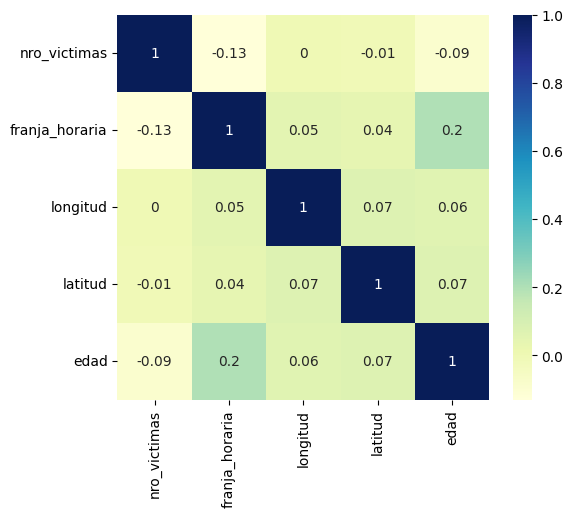

In [15]:
# Generamos un mapa de calor con las correlaciones de los datos
dataNumerica = data.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)
plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

Se puede verificar que existe una correlación entre la Edad y la Franja Horaria, en un posterior Análisis en PowerBi vimos la intersección con el sexo y se obtuvo una valiosa información

## Análisis exploratorio y visualización

Columnas que analizaremos:

1. Comuna
2. Franja horaria
3. Latitud, Longitud

A continuación se listan las comunas que existen en la Ciudad Autónoma de Buenos Aires(CABA)

In [16]:
data.comuna.unique()

array(['comuna 8', 'comuna 9', 'comuna 1', 'comuna 11', 'comuna 15',
       'comuna 4', 'comuna 7', 'comuna 12', 'comuna 3', 'comuna 13',
       'comuna 14', 'comuna 10', 'comuna 6', 'comuna 2', 'comuna 5', 'SD'],
      dtype=object)

Listado de Comunas respecto a la Cantidad de Siniestros Viales en la Ciudad Autónoma de Buenos Aires(CABA)

In [17]:
comunas_by_accident = data.comuna.value_counts().sort_values()
comunas_by_accident

comuna
SD            2
comuna 6     22
comuna 5     22
comuna 2     25
comuna 10    30
comuna 11    33
comuna 14    37
comuna 12    39
comuna 13    40
comuna 15    45
comuna 3     46
comuna 7     62
comuna 8     67
comuna 9     75
comuna 4     79
comuna 1     93
Name: count, dtype: int64

<Axes: ylabel='comuna'>

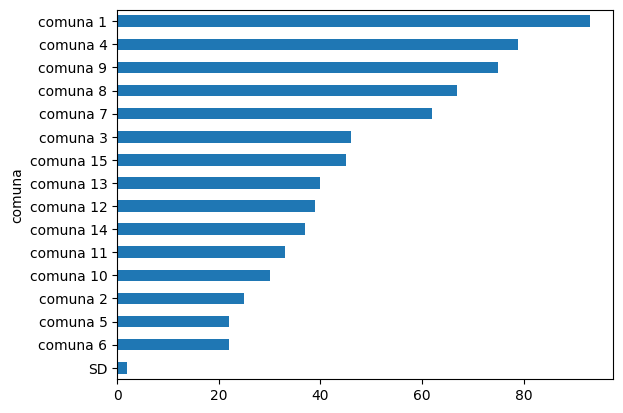

In [18]:
comunas_by_accident[:17].plot(kind='barh')

Considerando un Top 3 de las principales Comunas asociadas a una mayor cantidad de Siniestros Viales, son : Comuna 1, Comuna 4 y Comuna 9

Valores que contiene la columna "Franja Horaria" vital para un posterior análisis sobre el rango de horas mas frecuentes en Siniestros Viales

In [19]:
data.franja_horaria.unique()

<IntegerArray>
[   4,    1,    7,    0,    5,   18,   19,   15,   11,   22,   16,    9,   23,
    6,   10,   17,   12,    8,   20,   21,   14,    3,    2,   13, <NA>]
Length: 25, dtype: Int64

In [20]:
franja_accidente = data.franja_horaria.value_counts().sort_values()
franja_accidente

franja_horaria
13    17
2     18
0     23
15    25
1     25
3     26
20    26
4     27
23    28
11    29
21    29
16    30
19    30
10    31
8     31
22    31
17    31
12    32
18    33
14    33
9     37
5     39
6     42
7     43
Name: count, dtype: Int64

<Axes: ylabel='franja_horaria'>

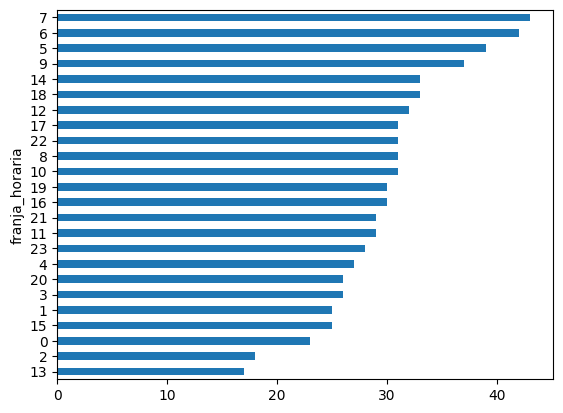

In [21]:
franja_accidente[:25].plot(kind='barh')

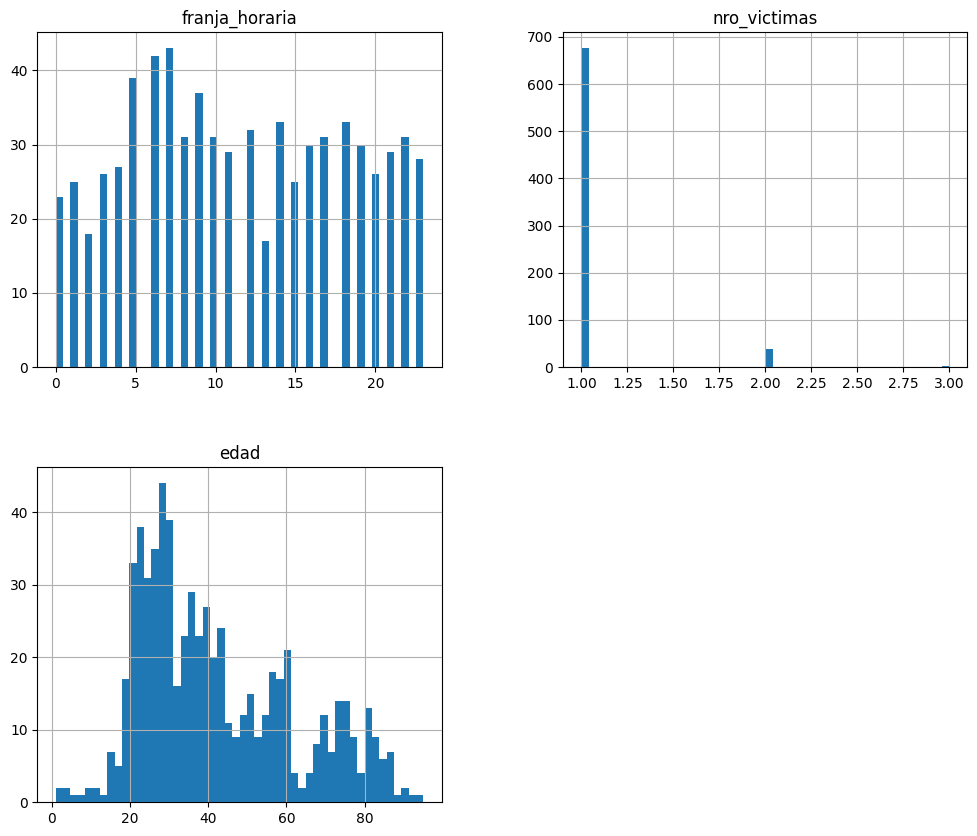

In [22]:
dataHisto=data[['franja_horaria','nro_victimas','edad']]
dataHisto.hist(bins = 50, figsize= (12,10))
plt.show()

Por medio de los gráficos anteriores podemos identificar el rango de edad de 20 a 40 años y la Franja Horaria de 5 a 10 estan asociados a una mayor cantidad de Siniestros Viales 

Se puede reconocer que el rango de horas que posee más Accidentes de Tránsitos está entre las 5 - 7 horas de la mañana

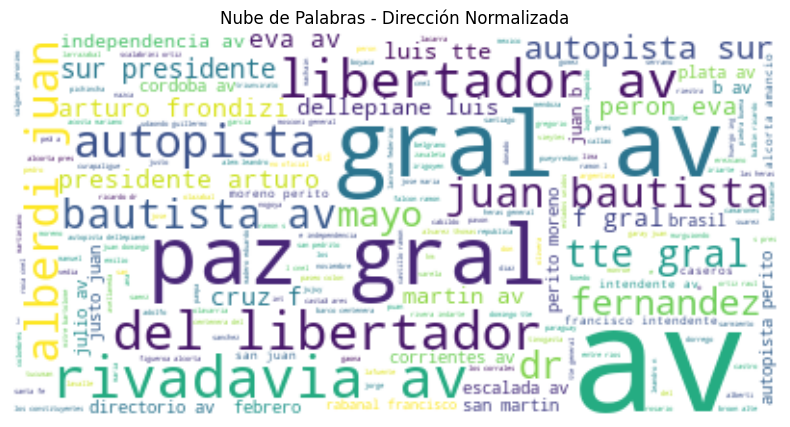

In [23]:
title_words = ' '.join(data['direc_normalizada'].astype(str))
title_words = title_words.lower()
stopwords = ["de", "y","el", "la", "&", ":", "para", "por", "en",  "con"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Dirección Normalizada')
plt.show()

Al realizar el gráfico de nube de palabras de la columna "Dirección Normalizada" se puede inferir que tipo el de vías asociados a una mayor cantidad de Siniestros Viales es la Avenida aquí podemos reconocer a la Avenida Gral Paz en un analisis posterior será importante identificar las avenidas por comuna que presentan mayor cantidad de Accidentes de Tránsito

Consultando los valores de Latitud y longitud para un posterior Análisis de GeoLocalización

In [24]:
data.latitud

0     -34.687570
1     -34.669777
2     -34.631894
3     -34.680930
4     -34.622466
         ...    
712   -34.645616
713   -34.651178
714   -34.619847
715   -34.650217
716   -34.586796
Name: latitud, Length: 717, dtype: float64

In [25]:
data.longitud

0     -58.475340
1     -58.508775
2     -58.390403
3     -58.465039
4     -58.387183
         ...    
712   -58.433538
713   -58.467398
714   -58.472934
715   -58.470668
716   -58.379762
Name: longitud, Length: 717, dtype: float64

Hallamos la localización de los Siniestros Viales a partir de la latitud y longitud


In [26]:
dataLocalizacion = data[data['latitud'].notnull()]
dataLocalizacion = dataLocalizacion[dataLocalizacion['longitud'].notnull()]

lat_lon_pairs = list(zip(list(dataLocalizacion.latitud), list(dataLocalizacion.longitud)))

Usando Folium para generar un mapa simple a partir de los datos de Localización

In [27]:
map = folium.Map(location=[-58,-34], zoom_start=3.4)
HeatMap(lat_lon_pairs).add_to(map)


In [28]:
map

Antes de comenzar a usar geopandas, se define el sistema de referencia de coordenadas (CRS) este le dice a Python cómo se relacionan esas coordenadas con los lugares de la Tierra luego se necesita decirle a Python el sistema de referencia de coordenadas.

In [29]:

crs={'init':'epsg:4326'}


Se define la geometría

In [30]:

geometry=[Point(xy) for xy in zip(data["longitud"], data["latitud"])]

Se tiene sistema de referencia y la geometría en su lugar, finalmente carguemos nuestros datos

In [31]:

geodata=gpd.GeoDataFrame(data,crs=crs, geometry=geometry)

Se muestran los puntos de datos que se asignaron en función de la latitud y la longitud 

<Axes: >

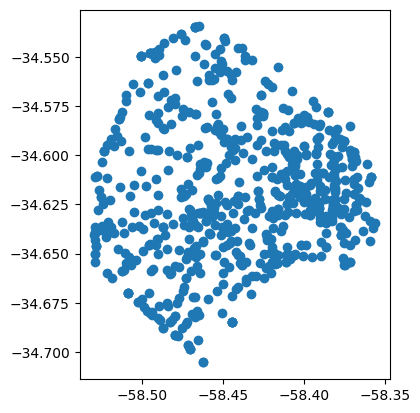

In [32]:

geodata.plot()

Ahora se mapearan los puntos en un mapa real y se necesita usar un archivo Shapefile de la Ciudad de Buenos Aires

In [33]:

shapefile = gpd.read_file(r'../comunas/comunas_wgs84.shp')

Ahora podemos trazar el mapa de la Ciudad Atónoma de Buenos Aires y luego agregar los puntos que hacen referencia a la localización de los Siniestros Viales

Text(40.02858004940542, 0.5, 'Latitud')

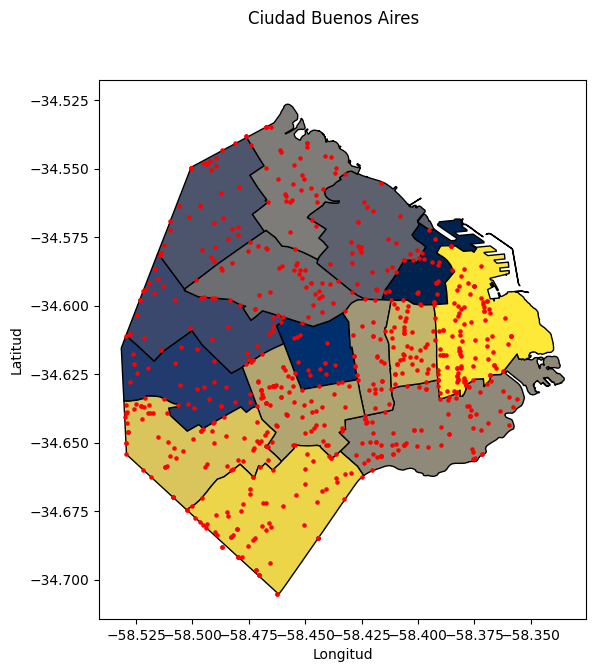

In [34]:

fig, ax = plt.subplots(figsize=(7,7))

shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="cividis")

geodata.plot(ax=ax, color='red', markersize=5);

fig.suptitle('Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')

Se reconoce que la mayor cantidad de Siniestros Viales se encuentran al Este de la Ciudad Autónoma de Buenos Aires y corresponden a las comunas 1 y 4